In [1]:
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [6]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [7]:
X_train/=255
X_test/=255

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# MNIST input shape (28x28 grayscale image)
input_shape = (28, 28, 1)

model = Sequential()

model.add(Conv2D(
    filters=28,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=input_shape
))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


C:\Users\kavvi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(
    x=X_train,
    y=y_train,
    epochs=10)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x=X_train,
    y=y_train,
    epochs=10
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9466 - loss: 0.1764
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9787 - loss: 0.0673
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9856 - loss: 0.0457
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9890 - loss: 0.0340
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9911 - loss: 0.0257
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9932 - loss: 0.0208
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9941 - loss: 0.0171
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9952 - loss: 0.0139
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9960 - loss: 0.0115
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9963 - loss: 0.0110


In [19]:
PR=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0471


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


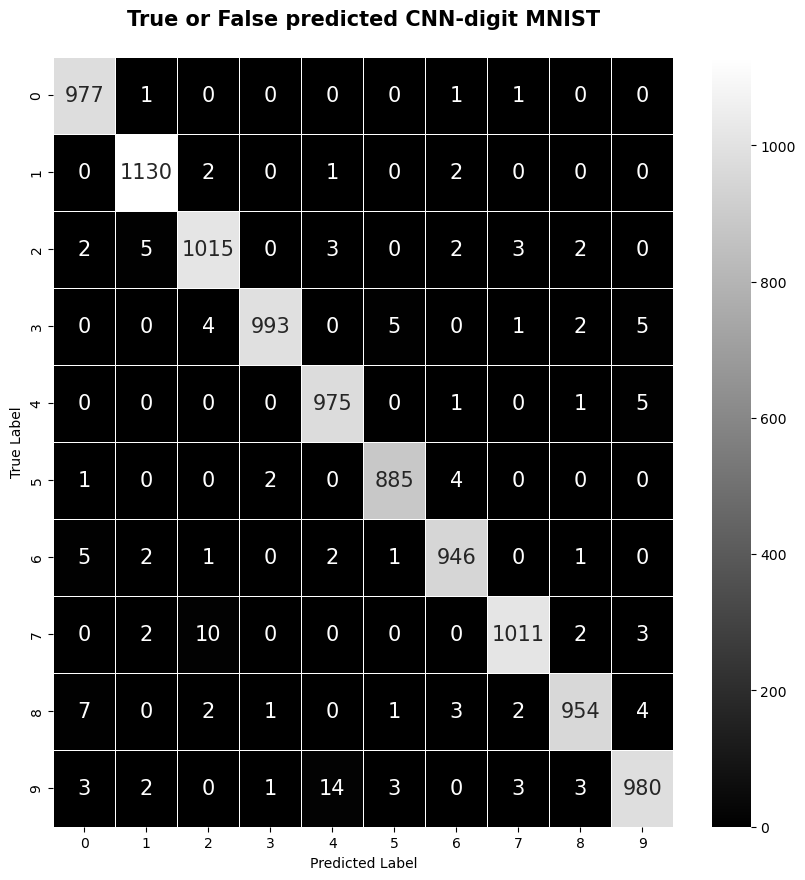

In [18]:
#Evaluation

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

plt.style.use("seaborn-v0_8-deep")
plt.figure(figsize=(10,10))

sns.heatmap(
    con_mat,
    annot=True,
    annot_kws={'size':15},
    linewidths=0.5,
    fmt='d',
    cmap='gray'
)

plt.title('True or False predicted CNN-digit MNIST\n',
          fontweight='bold',
          fontsize=15)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [21]:
from sklearn.metrics import classification_report

# Predictions
PR = model.predict(X_test).argmax(axis=1)

# Classification report
print(classification_report(y_test, PR))

# Training history keys
print(history.history.keys())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



NameError: name 'history' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
6


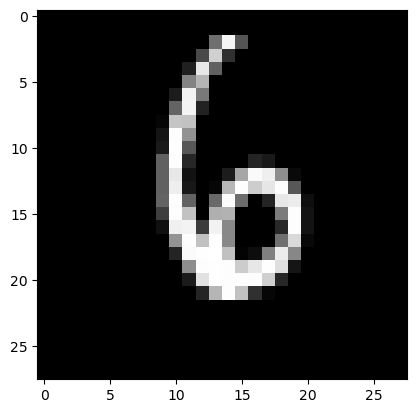

In [11]:
import matplotlib.pyplot as plt

image_index = 6900
plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')

predict = X_test[image_index].reshape(28,28)

pred = model.predict(X_test[image_index].reshape(1,28,28,1))
print(pred.argmax())
